In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gold-price-data/gld_price_data.csv


In [10]:
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [7]:
df= pd.read_csv('/kaggle/input/gold-price-data/gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [11]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
df.shape

(2290, 6)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


**No NULL Values present**

Correlation- Positive and Negative

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=true, square=true, fmt='.if')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


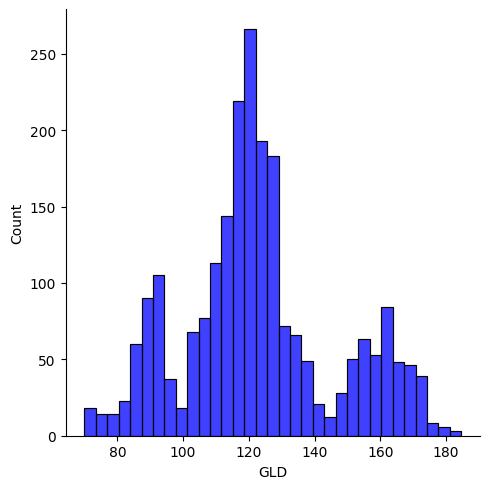

In [16]:
sns.displot(df['GLD'], color='Blue')

In [18]:
X= df.drop(['Date','GLD'], axis=1)
Y= df['GLD']

In [19]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [20]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Train-test split

In [21]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

In [24]:
regressor=RandomForestRegressor(n_estimators=100)

In [26]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [28]:
Test_data_prediction=regressor.predict(X_test)

In [29]:
print(Test_data_prediction)

[168.5109993   82.12459969 115.95540012 127.52980085 121.02200071
 154.70339637 150.32259897 126.16440027 117.51169864 126.05810078
 116.51730126 171.47940136 141.72309789 167.55929766 115.33190005
 117.3945006  140.10020281 169.84590067 159.4712026  159.90639972
 155.13880034 125.53060024 176.32399975 157.01190369 125.15630091
  93.80580013  77.88110053 120.67230019 119.19299978 167.47240017
  87.93920048 125.24420021  91.17600067 117.55680025 121.06369894
 135.90940086 115.40480134 115.05290078 148.63420013 107.46230112
 104.0382022   87.08589771 126.43030096 118.02539988 153.61069859
 119.65680018 108.35600011 108.03029831  93.07140063 127.14009774
  75.52139998 113.60279924 121.32219954 111.38309928 118.91389894
 120.60209929 160.03899957 169.80310105 146.89049635  86.00259881
  94.32200051  86.75539881  90.45289957 118.95960086 126.42840051
 127.3562     169.67969952 122.32449903 117.49499886  98.42249967
 168.74660159 142.86309898 131.53450202 121.2301024  120.90319958
 119.90480

In [31]:
# R square error
error_score=metrics.r2_score(Y_test,Test_data_prediction)
print("R squared erroe:", error_score)

R squared erroe: 0.9892416802778243
